### NN with torch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transforms to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Train the model
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Test accuracy: %d %%' % (100 * correct / total))

100%|██████████| 9912422/9912422 [00:01<00:00, 5984081.57it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28630511.42it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4773916.31it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Test accuracy: 97 %


Test accuracy: 97 %

### Tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2558 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0792 

In [3]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture with batch normalization
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2378 - accuracy: 0.9288
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1165 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0638 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0562 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9868
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1177 

In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture with batch normalization, dropout, and L2 regularization
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5879 - accuracy: 0.8831
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3846 - accuracy: 0.9290
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3416 - accuracy: 0.9368
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3289 - accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3114 - accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.9419
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3072 - accuracy: 0.9452
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.9433
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3062 - accuracy: 0.9449
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2268 

In [3]:
import numpy as np
from scipy.special import softmax

# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2, axis=1)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        dZ2 = self.a2 - y
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, learning_rate, epochs):
        for i in range(epochs):
            a2 = self.forward(X)
            self.backward(X, y, learning_rate)
            if i % 100 == 0:
                loss = self.compute_loss(y, a2)
                print("Epoch {}: loss = {}".format(i, loss))

    def compute_loss(self, y, y_hat):
        return (-1 / y.shape[0]) * np.sum(y * np.log(y_hat))

# Generate some random data for testing
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, (100, 1))

# Create a neural network with 2 input units, 4 hidden units, and 1 output unit
nn = NeuralNetwork(2, 4, 1)

# Train the neural network on the data
nn.train(X, y, 0.1, 1000)

# Make predictions on some new data
X_new = np.array([[0.5, 0.5], [-0.5, -0.5]])
y_pred = nn.forward(X_new)
print(y_pred)

Epoch 0: loss = -0.0
Epoch 100: loss = -0.0
Epoch 200: loss = -0.0
Epoch 300: loss = -0.0
Epoch 400: loss = -0.0
Epoch 500: loss = -0.0
Epoch 600: loss = -0.0
Epoch 700: loss = -0.0
Epoch 800: loss = -0.0
Epoch 900: loss = -0.0
[[1.]
 [1.]]


In [13]:
# create a neural network with 2 input units, 4 hidden units, and 1 output unit

# train the neural network on the data

# make predictions on some new data

import numpy as np

# Define the neural network architecture 
class NeuralNetwork:
    def __init__(self):
        # Set up the architecture of the neural network
        self.input_size = 2
        self.hidden_size = 4
        self.output_size = 1

        # Initialize the weights and biases of the neural network
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Perform the forward pass of the neural network
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_hat = np.tanh(self.z2)

        return self.y_hat

    def backward(self, X, y, y_hat, learning_rate):
        # Perform the backward pass of the neural network
        delta2 = (y_hat - y) * (1 - np.square(np.tanh(self.z2)))
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.W2.T) * (1 - np.square(np.tanh(self.z1)))
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        # Update the weights and biases of the neural network
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, num_epochs, learning_rate):
        # Train the neural network on the data
        for epoch in range(num_epochs):
            # Perform the forward pass
            y_hat = self.forward(X)

            # Calculate the loss
            loss = np.mean(np.square(y_hat - y))

            # Perform the backward pass
            self.backward(X, y, y_hat, learning_rate)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        # Make predictions on some new data
        y_hat = self.forward(X)

        return y_hat

# Create some training data
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# Create a neural network and train it on the data
nn = NeuralNetwork()
nn.train(X_train, y_train, num_epochs=1000, learning_rate=0.1)

# Create some test data
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Make predictions on the test data
y_pred = nn.predict(X_test)

# Print the predictions
print(y_pred)

Epoch 0, Loss: 0.3381
Epoch 100, Loss: 0.0084
Epoch 200, Loss: 0.0032
Epoch 300, Loss: 0.0019
Epoch 400, Loss: 0.0013
Epoch 500, Loss: 0.0010
Epoch 600, Loss: 0.0008
Epoch 700, Loss: 0.0007
Epoch 800, Loss: 0.0006
Epoch 900, Loss: 0.0005
[[7.80094043e-04]
 [9.69427714e-01]
 [9.69523374e-01]
 [2.13963415e-03]]


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(iris.data, iris.target)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.9866666666666667


In [14]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from scipy.stats import uniform, loguniform

# Load the iris dataset
iris = load_iris()

# Define the hyperparameter distributions to sample from
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': loguniform(1e-4, 1e-1)
}

# Create an SVM model
svm = SVC()

# Perform randomized search to find the best hyperparameters
randomized_search = RandomizedSearchCV(svm, param_distributions, n_iter=10, cv=5)
randomized_search.fit(iris.data, iris.target)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', randomized_search.best_params_)
print('Best score:', randomized_search.best_score_)

Best hyperparameters: {'C': 1.6144561043192063, 'gamma': 0.026059844112242776, 'kernel': 'poly'}
Best score: 0.9866666666666667


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create an SVM model
svm = SVC(C=1, kernel='rbf', gamma=0.1)

# Perform 5-fold cross-validation to evaluate the model's performance
scores = cross_val_score(svm, iris.data, iris.target, cv=5)

# Print the average score and standard deviation
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())

Average score: 0.9800000000000001
Standard deviation: 0.016329931618554516


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_score = best_model.score(X_val, y_val)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

# Print the validation and test scores
print('Validation score:', val_score)
print('Test score:', test_score)

Validation score: 0.9166666666666666
Test score: 1.0


### SKlearn ML pipline

In [2]:
#import simpleimputer and pipeline

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# import standard scaler

from sklearn.preprocessing import StandardScaler

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test,y_test)))

### training to convert 1 image to text model

In [2]:
# install pytesseract
!pip install pytesseract

# install PIL
!pip install pillow

In [5]:
# install google cloud vision
!pip install google-cloud-vision

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires wrapt<1.15,>=1.11.0, but you have wrapt 1.10.8 which is incompatible.



     -------------------------------------- 444.1/444.1 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.53.0
    Uninstalling grpcio-1.53.0:
      Successfully uninstalled grpcio-1.53.0


In [4]:
#Convert PNG to JPG

from PIL import Image

# Load the PNG image
png_image = Image.open(r'C:\Users\kami.cheung\Downloads\Annotation 2023-04-27 165449.png')

# Convert the PNG image to a JPG image
jpg_image = png_image.convert('RGB')

# Save the JPG image
jpg_image.save(r'C:\Users\kami.cheung\Downloads\Annotation 2023-04-27 165449_2.jpg')

In [5]:
import os
from google.cloud import vision
from google.cloud.vision_v1 import types
from PIL import Image

# Set the path to the service account key file
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\kami.cheung\Documents\GitHub\Deep Learning Projects\Google cloud vision api\x-summit-389607-8a0bf83ac485.json'

# Load the image
image_path = r'C:\Users\kami.cheung\Downloads\Annotation 2023-04-27 165449_2.jpg'
image = Image.open(image_path)

# Create a client object for the Google Cloud Vision API
client = vision.ImageAnnotatorClient()

# Convert the image to a format that the API can process
with open(image_path, 'rb') as image_file:
    content = image_file.read()
image_content = types.Image(content=content)

# Use the API to detect text in the image
response = client.text_detection(image=image_content)

# Extract the detected text from the response
text = response.text_annotations[0].description

# Print the detected text
print(text)

Building your
Lakehouse
Comprehensive investment
into your success
Supported by 24/7/365 global,
production operations at scale
©2022 Databricks Inc. All rights reserved
Co-located
Professional
Services
Solution
Accelerators
Your
success
In-person and
Virtual Training
14


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape of the images
input_shape = (28, 28, 1)

# Define the CNN model
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define the LSTM model
lstm_model = tf.keras.Sequential([
    layers.LSTM(64, input_shape=(None, 28), return_sequences=True),
    layers.LSTM(32),
    layers.Dense(10, activation='softmax')
])

# Compile the models
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1385 - accuracy: 0.9577 - val_loss: 0.0470 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0369 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0391 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0274 -

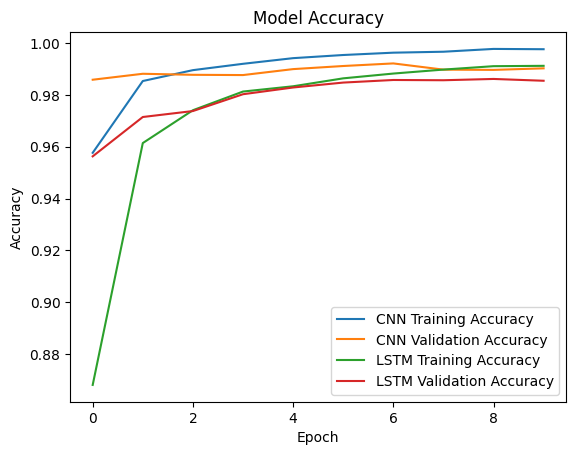

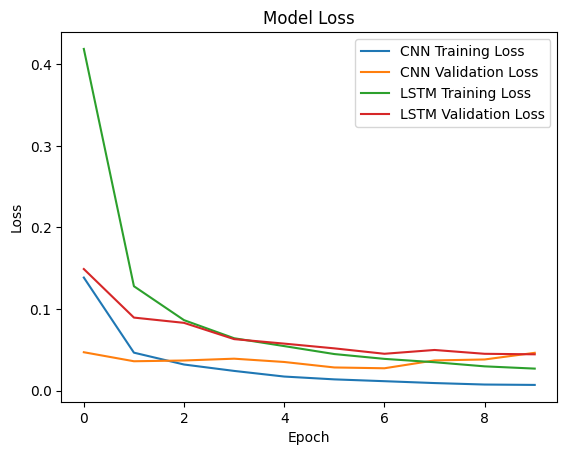

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the input data
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the input shape of the images
input_shape = (28, 28, 1)

# Define the CNN model
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define the LSTM model
lstm_model = tf.keras.Sequential([
    layers.LSTM(64, input_shape=(None, 28), return_sequences=True),
    layers.LSTM(32),
    layers.Dense(10, activation='softmax')
])

# Compile the models
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the models
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the accuracy and loss curves
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Mnist recognition using CNN + LSTM from scratch

import numpy as np

class Conv2D:
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.filters = np.random.randn(num_filters, filter_size, filter_size) / (filter_size * filter_size)
        
    def iterate_regions(self, image):
        h, w = image.shape
        
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                im_region = image[i:(i + self.filter_size), j:(j + self.filter_size)]
                yield im_region, i, j
                
    def forward(self, input):
        self.last_input = input
        
        h, w = input.shape
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))
            
        return output

    def backward(self, d_L_d_out, learn_rate):
        d_L_d_filters = np.zeros(self.filters.shape)
        
        for im_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_L_d_filters[f] += d_L_d_out[i, j, f] * im_region
                
        self.filters -= learn_rate * d_L_d_filters
        return None

class MaxPool2D:
    def __init__(self, pool_size):
        self.pool_size = pool_size
        
    def iterate_regions(self, image):
        h, w, _ = image.shape
        new_h = h // self.pool_size
        new_w = w // self.pool_size
        
        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * self.pool_size):(i * self.pool_size + self.pool_size),
                                  (j * self.pool_size):(j * self.pool_size + self.pool_size)]
                yield im_region, i, j
                
    def forward(self, input):
        self.last_input = input
        
        h, w, num_filters = input.shape
        output = np.zeros((h // self.pool_size, w // self.pool_size, num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.amax(im_region, axis=(0, 1))
            
        return output
    
    def backward(self, d_L_d_out):
        d_L_d_input = np.zeros(self.last_input.shape)
        
        for im_region, i, j in self.iterate_regions(self.last_input):
            h, w, f = im_region.shape
            amax = np.amax(im_region, axis=(0, 1))
            
            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        if im_region[i2, j2, f2] == amax[f2]:
                            d_L_d_input[i * self.pool_size + i2, j * self.pool_size + j2, f2] = d_L_d_out[i, j, f2]
                            
        return d_L_d_input

class Dense:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros(output_size)
        
    def forward(self, input):
        self.last_input = input
        output = np.dot(input, self.weights) + self.biases
        return output
    
    def backward(self, d_L_d_out, learn_rate):
        d_L_d_weights = np.dot(self.last_input.T, d_L_d_out)
        d_L_d_biases = np.sum(d_L_d_out, axis=0)
        d_L_d_input = np.dot(d_L_d_out, self.weights.T)
        
        self.weights -= learn_rate * d_L_d_weights
        self.biases -= learn_rate * d_L_d_biases
        
        return d_L_d_input

class LSTM:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        
        self.wf = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bf = np.zeros(output_size)
        
        self.wi = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bi = np.zeros(output_size)
        
        self.wc = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bc = np.zeros(output_size)
        
        self.wo = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bo = np.zeros(output_size)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, inputs):
        h = np.zeros((inputs.shape[0], self.output_size))
        c = np.zeros((inputs.shape[0], self.output_size))
        
        self.last_inputs = inputs
        self.last_hs = { 0: h }
        self.last_cs = { 0: c }
        
        for i, x in enumerate(inputs):
            prev_h = h
            prev_c = c
            
            # Forget gate
            f = self.sigmoid(np.dot(np.concatenate([x, prev_h], axis=1), self.wf) + self.bf)
            c = f * prev_c
            
            # Input gate
            i = self.sigmoid(np.dot(np.concatenate([x, prev_h], axis=1), self.wi) + self.bi)
            c_ = np.tanh(np.dot(np.concatenate([x, prev_h], axis=1), self.wc) + self.bc)
            c = i * c_ + (1 - i) * c
            
            # Output gate
            o = self.sigmoid(np.dot(np.concatenate([x, prev_h], axis=1), self.wo) + self.bo)
            h = o * np.tanh(c)
            
            self.last_hs[i + 1] = h
            self.last_cs[i + 1] = c
            
        return h
    
    def backward(self, d_L_d_h, learn_rate):
        d_L_d_wf = np.zeros(self.wf.shape)
        d_L_d_wi = np.zeros(self.wi.shape)
        d_L_d_wc = np.zeros(self.wc.shape)
        d_L_d_wo = np.zeros(self.wo.shape)
        
        d_L_d_x = np.zeros(self.last_inputs.shape)
        d_L_d_prev_h = np.zeros((self.last_inputs.shape[0], self.output_size))
        d_L_d_prev_c = np.zeros((self.last_inputs.shape[0], self.output_size))
        
        for t in reversed(range(len(self.last_inputs))):
            # Compute gradients
            d_L_d_h_total = d_L_d_h + d_L_d_prev_h
            d_L_d_o = d_L_d_h_total * np.tanh(self.last_cs[t + 1])
            d_L_d_c_ = d_L_d_h_total * self.last_hs[t + 1] * (1 - np.tanh(self.last_cs[t + 1]) ** 2)
            d_L_d_i = d_L_d_c_ * self.last_cs[t]
            d_L_d_f = d_L_d_c_ * self.last_cs[t - 1]
            d_L_d_c_prev = d_L_d_c_ * self.last_fs[t]
            
            d_L_d_wf += np.dot(np.concatenate([self.last_inputs[t], self.last_hs[t]], axis=1).T, d_L_d_f)
            d_L_d_wi += np.dot(np.concatenate([self.last_inputs[t], self.last_hs[t]], axis=1).T, d_L_d_i)
            d_L_d_wc += np.dot(np.concatenate([self.last_inputs[t], self.last_hs[t]], axis=1).T, d_L_d_c_)
            d_L_d_wo += np.dot(np.concatenate([self.last_inputs[t], self.last_hs[t]], axis=1).T, d_L_d_o)
            
            d_L_d_x[t] = np.dot(d_L_d_f, self.wf[:self.input_size].T)
            d_L_d_x[t] += np.dot(d_L_d_i, self.wi[:self.input_size].T)
            d_L_d_x[t] += np.dot(d_L_d_c_, self.wc[:self.input_size].T)
            d_L_d_x[t] += np.dot(d_L_d_o, self.wo[:self.input_size].T)
            
            d_L_d_prev_h = np.dot(d_L_d_f, self.wf[self.input_size:].T)
            d_L_d_prev_h += np.dot(d_L_d_i, self.wi[self.input_size:].T)
            d_L_d_prev_h += np.dot(d_L_d_c_, self.wc[self.input_size:].T)
            d_L_d_prev_h += np.dot(d_L_d_o, self.wo[self.input_size:].T)
            
            d_L_d_prev_c = d_L_d_c_prev * self.last_fs[t - 1]
            
        self.wf -= learn_rate * d_L_d_wf
        self.wi -= learn_rate * d_L_d_wi
        self.wc -= learn_rate * d_L_d_wc
        self.wo -= learn_rate * d_L_d_wo
        
        return d_L_d_x

class Model:
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return input
    
    def backward(self, output_grad, learn_rate):
        for layer in reversed(self.layers):
            output_grad = layer.backward(output_grad, learn_rate)
        return output_grad

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the input data
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the input shape of the images
input_shape = (28, 28, 1)

# Create the CNN and LSTM models
cnn_model = Model([
    Conv2D(8, 3),
    MaxPool2D(2),
    Conv2D(16, 3),
    MaxPool2D(2),
    layers.Flatten(),
    Dense(256, 10)
])

lstm_model = Model([
    LSTM(28, 64),
    LSTM(64, 32),
    Dense(32, 10)
])

# Train the models
for i in range(10):
    print('Epoch', i + 1)
    
    # Train the CNN model
    for j in range(len(x_train)):
        output = cnn_model.forward(x_train[j])
        error = output - y_train[j]
        cnn_model.backward(error, 0.01)
        
    # Train the LSTM model
    for j in range(len(x_train)):
        output = lstm_model.forward(x_train[j])
        error = output - y_train[j]
        lstm_model.backward(error, 0.01)
        
    # Evaluate the models
    cnn_correct = 0
    lstm_correct = 0
    
    for j in range(len(x_test)):
        cnn_output = cnn_model.forward(x_test[j])
        cnn_prediction = np.argmax(cnn_output)
        cnn_correct += cnn_prediction == np.argmax(y_test[j])
        
        lstm_output = lstm_model.forward(x_test[j])
        lstm_prediction = np.argmax(lstm_output)
        lstm_correct += lstm_prediction == np.argmax(y_test[j])
        
    print('CNN Accuracy:', cnn_correct / len(x_test))
    print('LSTM Accuracy:', lstm_correct / len(x_test))

In [ ]:
import numpy as np

class LSTM:
    def __init__(self, input_size, output_size):
        # Initialize the weights and biases of the LSTM cell
        self.wf = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bf = np.zeros((1, output_size))
        self.wi = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bi = np.zeros((1, output_size))
        self.wc = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bc = np.zeros((1, output_size))
        self.wo = np.random.randn(input_size + output_size, output_size) / np.sqrt(input_size + output_size)
        self.bo = np.zeros((1, output_size))
        
    def forward(self, x, h_prev, c_prev):
        # Concatenate the input and previous hidden state
        concat = np.hstack((x, h_prev))
        
        # Compute the forget gate
        f = sigmoid(np.dot(concat, self.wf) + self.bf)
        
        # Compute the input gate
        i = sigmoid(np.dot(concat, self.wi) + self.bi)
        
        # Compute the candidate cell state
        c_bar = np.tanh(np.dot(concat, self.wc) + self.bc)
        
        # Compute the new cell state
        c = f * c_prev + i * c_bar
        
        # Compute the output gate
        o = sigmoid(np.dot(concat, self.wo) + self.bo)
        
        # Compute the new hidden state
        h = o * np.tanh(c)
        
        # Return the new hidden state and cell state
        return h, c

def sigmoid(x):
    # Compute the sigmoid function
    return 1 / (1 + np.exp(-x))

#### Mnist basic startup with model history and loss

In [1]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.9159 - val_loss: 0.1728 - val_accuracy: 0.9505
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1470 - accuracy: 0.9570 - val_loss: 0.1245 - val_accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1084 - val_accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 0.0998 - val_accuracy: 0.9698
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0920 - val_accuracy: 0.9710


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0852 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0899 - val_accuracy: 0.9736


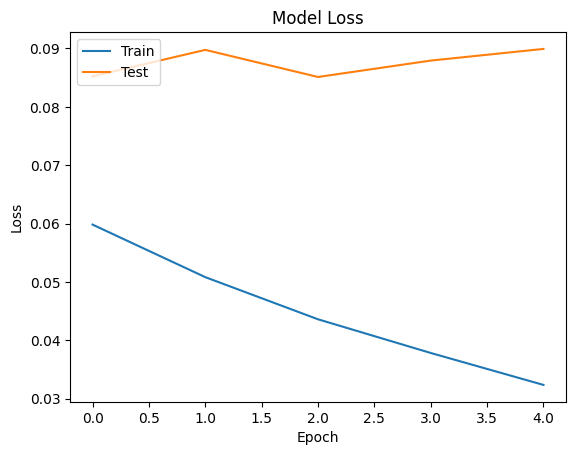

In [2]:
# plot model history and loss

import matplotlib.pyplot as plt
import numpy as np

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# plot model history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()